In [75]:
########### Content-based filtering

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
file1 = '/content/drive/My Drive/file.tsv'
file2 = '/content/drive/My Drive/file2.csv'

In [78]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 
  
df = pd.read_csv(file1, sep='\t', names=column_names) 
   
df.head() 



,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [79]:

movie_titles = pd.read_csv(file2)
movie_titles.head()



,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [80]:
data = pd.merge(df, movie_titles, on='item_id') 
data.head() 


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [81]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [82]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [83]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())    
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
ratings.head() 

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('white') 
%matplotlib inline 


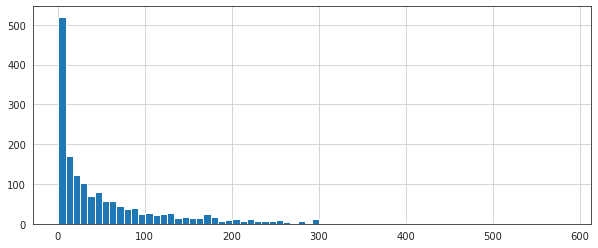

In [102]:

plt.figure(figsize =(10, 4)) 

ratings['num of ratings'].hist(bins = 70) 


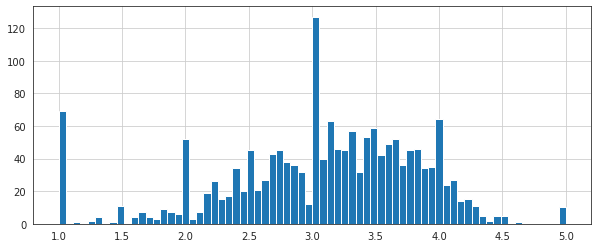

In [86]:
 
plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(bins = 70) 


In [87]:
 
moviemat = data.pivot_table(index ='user_id', 
			columns ='title', values ='rating') 

moviemat.head() 


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:

ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [89]:

starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 
  
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [90]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head() 

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [91]:

corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 

corr_starwars.head() 


corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [92]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [0]:
######### Collaborative filtering

In [154]:
ratings = pd.read_csv('/content/drive/My Drive/ratings.csv')
movies = pd.read_csv('/content/drive/My Drive/movies.csv')
ratings = pd.merge(movies,ratings)
print(ratings.shape)
ratings.head()

(100836, 6)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [162]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
print("After: ",userRatings.shape)

Before:  (610, 9719)
After:  (610, 2269)


In [169]:
corrMatrix = userRatings.corr()
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),17 Again (2009),1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)","20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),21 (2008),21 Grams (2003),21 Jump Street (2012),22 Jump Street (2014),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Weeks Later (2007),30 Days of Night (2007),300 (2007),"39 Steps, The (1935)",3:10 to Yuma (2007),40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",48 Hrs. (1982),50 First Dates (2004),...,"Wolf of Wall Street, The (2013)","Wolverine, The (2013)",Women on the Verge of a Nervous Breakdown (Mujeres al borde de un ataque de nervios) (1988),Wonder Boys (2000),Wonder Woman (2017),Working Girl (1988),"World Is Not Enough, The (1999)",World War Z (2013),"World's End, The (2013)",Wreck-It Ralph (2012),"Wrestler, The (2008)",Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X-Men Origins: Wolverine (2009),X-Men: Apocalypse (2016),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yellow Submarine (1968),Yes Man (2008),Yojimbo (1961),You Don't Mess with the Zohan (2008),You Only Live Twice (1967),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,0.049700,0.176071,0.131993,0.104500,0.047271,0.184452,0.092824,0.084066,0.166599,0.205977,0.187019,0.006377,-0.027152,0.035609,-0.014293,-0.027713,0.099271,-0.028021,0.107001,0.117119,-0.028967,0.144642,0.109059,0.021677,0.131405,0.115386,0.124265,-0.022021,0.255706,0.024466,...,-0.001830,0.006420,-0.019439,0.194225,0.080328,0.160591,0.061280,-0.027261,0.031088,0.043787,0.081831,0.075004,0.213522,0.195512,0.087015,0.007059,-0.011004,0.049537,0.119975,0.098020,0.115369,0.016625,0.042313,-0.023309,0.021379,0.172502,0.201374,0.248535,0.088114,0.257195,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,0.297152,0.072835,0.226574,0.087240,0.342948,0.038255,0.040104,0.241906,0.001739,0.113616,0.030603,0.274272,0.285043,0.094029,0.284552,0.194200,0.086447,0.205511,0.048670,0.149167,0.157145,0.249836,0.343028,-0.034688,0.252980,0.174618,0.344805,0.023625,0.156628,0.314037,...,0.241685,0.207393,0.040382,0.100958,0.225268,0.044576,0.031382,0.265563,0.303689,0.126481,0.388055,0.023020,0.031399,0.184228,0.320018,0.238263,0.288610,0.349784,0.274941,0.190061,0.034780,0.407336,0.029789,0.144834,-0.012948,0.140981,0.066077,0.073476,0.053263,0.053021,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,-0.027835,-0.029983,0.181245,0.017315,-0.019197,0.049227,-0.020711,0.097364,0.012478,0.099310,-0.025037,0.205739,0.082904,-0.030166,0.309963,0.292432,0.092291,-0.026642,-0.008488,0.228241,0.231702,0.263072,0.170440,-0.019994,0.104868,0.081960,0.145923,0.033310,0.147068,0.025681,...,0

In [0]:

def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating)
    similar_ratings = similar_ratings.sort_values(ascending=False)
  
    return similar_ratings

In [176]:

romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),17 Again (2009),1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)","20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),21 (2008),21 Grams (2003),21 Jump Street (2012),22 Jump Street (2014),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Weeks Later (2007),30 Days of Night (2007),300 (2007),"39 Steps, The (1935)",3:10 to Yuma (2007),40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",48 Hrs. (1982),50 First Dates (2004),...,"Wolf of Wall Street, The (2013)","Wolverine, The (2013)",Women on the Verge of a Nervous Breakdown (Mujeres al borde de un ataque de nervios) (1988),Wonder Boys (2000),Wonder Woman (2017),Working Girl (1988),"World Is Not Enough, The (1999)",World War Z (2013),"World's End, The (2013)",Wreck-It Ralph (2012),"Wrestler, The (2008)",Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X-Men Origins: Wolverine (2009),X-Men: Apocalypse (2016),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yellow Submarine (1968),Yes Man (2008),Yojimbo (1961),You Don't Mess with the Zohan (2008),You Only Live Twice (1967),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.315583,5.000000,0.712357,1.369946,0.969799,0.744513,0.710706,0.798778,0.677430,1.000675,1.485760,0.364173,1.132869,0.436199,1.714742,0.191276,0.200520,1.209530,0.008693,0.568080,0.153015,1.371358,1.425215,0.470145,1.422761,0.971000,0.432234,1.027557,0.243348,0.745833,0.785725,1.249178,1.715139,-0.173438,1.264901,0.873088,1.724023,0.118125,0.783140,1.570186,...,1.208424,1.036965,0.201912,0.504792,1.126339,0.222881,0.156910,1.327816,1.518444,0.632405,1.940276,0.115099,0.156993,0.921138,1.600088,1.191313,1.443051,1.748921,1.374706,0.950306,0.173898,2.036678,0.148946,0.724168,-0.064740,0.704905,0.330386,0.367382,0.266314,0.265105,1.872576,0.893275,0.342035,2.072927,1.778617,1.261130,1.080033,0.268068,1.205459,0.629526
1,-0.097657,1.223987,0.761004,0.679445,0.553310,0.514741,0.436950,0.586767,0.502931,0.509384,0.425653,0.198276,0.533975,0.235958,0.219969,0.025418,-0.085093,0.480720,0.119977,0.312935,-0.102871,0.819784,0.926876,0.137891,0.985087,0.445475,0.306062,0.434086,0.378778,0.401926,0.715914,0.812559,1.011461,-0.082151,0.750267,0.632618,0.728395,0.131258,0.231758,0.621990,...,0.701935,0.615553,0.069943,0.223635,0.623725,-0.028716,0.335536,0.774137,1.051707,0.545589,0.800513,-0.033233,-0.030278,0.520229,0.849882,0.698670,0.936821,0.895132,0.723885,0.447200,0.294757,0.815615,0.094008,0.518696,0.202236,0.483375,0.266574,0.209918,0.134970,0.069852,0.959444,0.513013,0.069384,1.061326,1.009810,0.730257,0.435539,0.154172,0.490583,0.165241
2,0.203148,0.041756,0.143133,0.079169,0.024706,0.042661,0.113463,0.186727,0.010855,0.068329,0.007679,0.239714,0.191211,0.119121,0.031646,0.276560,0.229265,0.108148,0.207876,0.468785,0.226689,0.057620,-0.001559,0.152963,0.093474,0.077545,0.239826,-0.012944,0.129656,0.293297,0.217647,0.168567,0.224519,0.141605,0.118583,0.068366,0.156554,0.042503,0.243620,0.113895,...,0.013003,0.108233,0.117629,0.200005,0.121611,0.159634,0.218320,0.165158,0.187966,0.109452,0.205296,0.084633,0.319782,0.312207,0.178889,0.138997,0.127501,0.132926,0.194578,0.281637

In [177]:
similar_movies.sum().sort_values(ascending=False).head(20)

(500) Days of Summer (2009)                    6.492975
Alice in Wonderland (2010)                     5.297004
Up in the Air (2009)                           4.101032
Zodiac (2007)                                  4.022329
Silver Linings Playbook (2012)                 3.985423
Kick-Ass (2010)                                3.827155
Scott Pilgrim vs. the World (2010)             3.700185
Crazy, Stupid, Love. (2011)                    3.529532
Secret Life of Walter Mitty, The (2013)        3.522672
Prometheus (2012)                              3.505166
Imaginarium of Doctor Parnassus, The (2009)    3.503108
Adventureland (2009)                           3.488267
Sherlock Holmes (2009)                         3.465507
Wrestler, The (2008)                           3.429135
50/50 (2011)                                   3.420006
300 (2007)                                     3.409829
Charlie and the Chocolate Factory (2005)       3.392702
Hangover, The (2009)                           3

In [178]:

action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

Amazing Spider-Man, The (2012)                           8.262335
Mission: Impossible III (2006)                           8.199621
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    7.492567
Over the Hedge (2006)                                    6.299157
Mission: Impossible - Ghost Protocol (2011)              6.245232
Toy Story 3 (2010)                                       6.186486
The Amazing Spider-Man 2 (2014)                          6.178875
Hancock (2008)                                           6.167351
Jumper (2008)                                            6.165987
Fantastic Four (2005)                                    6.140215
Snakes on a Plane (2006)                                 6.110051
Incredible Hulk, The (2008)                              6.070605
Crank (2006)                                             6.058822
Hellboy (2004)                                           5.993228
X-Men: The Last Stand (2006)                             5.978672
Thor (2011